In [2]:
import pandas as pd
import matplotlib.pyplot as plt

## Load dataset

In [4]:
from sklearn.datasets import load_digits

In [5]:
mnist = load_digits()

In [6]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

## Data

In [9]:
df_features = pd.DataFrame(mnist.data)

In [94]:
print(df_features.shape)
df_features.head()

(1797, 64)


,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


## Target

In [11]:
df_target = pd.DataFrame(mnist.target)

In [12]:
df_target.head()

,0
0,0
1,1
2,2
3,3
4,4


## Images

Image 8 x 8

0    9
Name: 655, dtype: int64


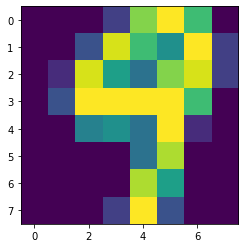

In [93]:
i = 655
print(df_target.iloc[i])
plt.imshow(mnist.images[i]);

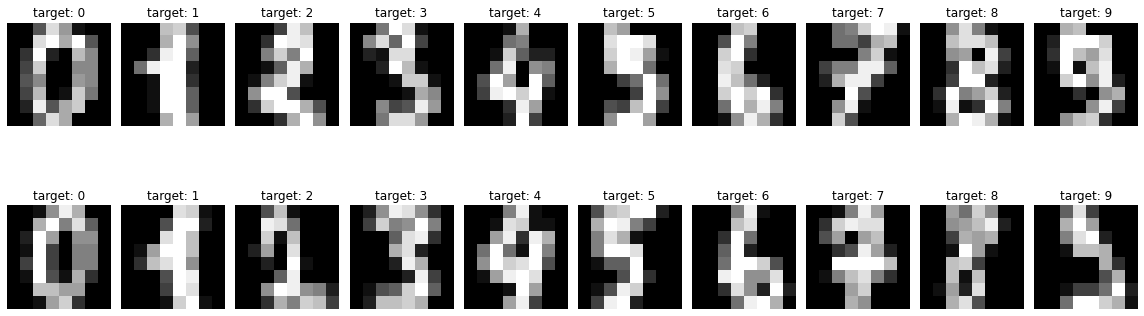

In [17]:
fig, axes = plt.subplots(2, 10, figsize=(16, 6))
for i in range(20):
    axes[i//10, i %10].imshow(mnist.images[i], cmap='gray');
    axes[i//10, i %10].axis('off')
    axes[i//10, i %10].set_title(f"target: {mnist.target[i]}")
    
plt.tight_layout()

## Split in test and train dataset

In [35]:
from sklearn.model_selection import train_test_split

In [66]:
df_train_features, df_test_features, df_train_target, df_test_target = train_test_split(df_features, df_target, test_size = 0.3)

In [67]:
print('df_train_features', df_train_features.shape)
print('df_train_target', df_train_target.shape)
print('df_test_features', df_test_features.shape)
print('df_test_target', df_test_target.shape)

df_train_features (1257, 64)
df_train_target (1257, 1)
df_test_features (540, 64)
df_test_target (540, 1)


In [68]:
X_train = df_train_features.values
y_train = df_train_target.values.ravel()
X_test = df_test_features.values
y_test = df_test_target.values.ravel()

In [69]:
print('X_train', X_train.shape)
print('y_train', y_train.shape)
print('X_test', X_test.shape)
print('y_test', y_test.shape)

X_train (1257, 64)
y_train (1257,)
X_test (540, 64)
y_test (540,)


In [71]:
df_results = df_test_target.copy()
df_results.columns = ['target']

## Naive Bayes Classification

In [82]:
from sklearn.naive_bayes import GaussianNB

In [83]:
nb_classifier = GaussianNB()

nb_classifier.fit(X_train, y_train)

GaussianNB()

In [84]:
y_predicted = nb_classifier.predict(X_test)

In [85]:
df_results['NB_predicted'] = y_predicted
df_results['NB_correct'] = df_results['NB_predicted'] == df_results['target']

In [86]:
df_results

,target,NB predicted,NB correct,NB_predicted,NB_correct
1063,6,6,True,6,True
780,4,4,True,4,True
928,3,3,True,3,True
1707,8,8,True,8,True
1136,5,5,True,5,True
...,...,...,...,...,...
915,0,0,True,0,True
299,7,7,True,7,True
902,0,0,True,0,True
1283,0,7,False,7,False


In [87]:
accuracy = df_results['NB_correct'].sum() / df_results['NB_correct'].count()
print(f'accuracy {round(accuracy * 100)}%')

accuracy 83%
